## Computer Network Lab 5
### Rohith Sudheer
### CS16B030

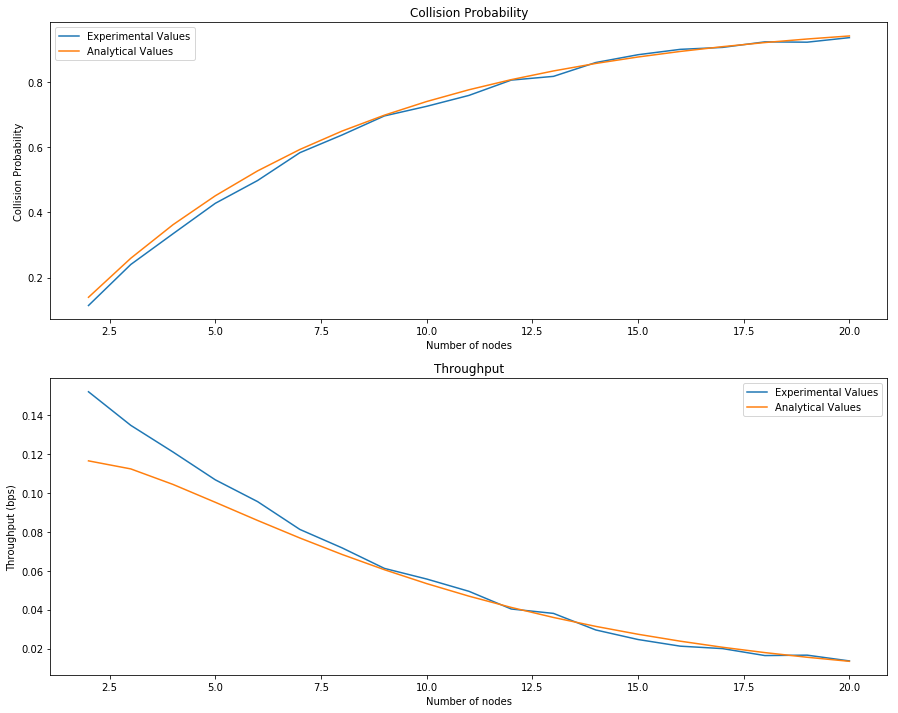

In [16]:
from random import randint, expovariate, seed
import matplotlib.pyplot as plt

seed(10)
beta = 0.3          #Parameter for exponential distribution
delta = 0.5         #Time for collisions to occur
ts = 6              #Time for succesful transmission
tc = 4              #Time for collision
iters = 2000        #Number of iterations
packetSize = 1      #Size of packet
maxNodes = 20       #Maximum number of nodes

#Generates new waiting time based on exponential distribution
def getNewTime(beta,time):
    return time + expovariate(beta)

#Checks for nodes colliding at the current time
def checkCollision(nodes, time, delta=delta):
    colList = []
    for no,node in enumerate(nodes):
        if time <= node <= time + delta:
            colList.append(no)
    return colList

#Gets the next node to wake up
def getMin(nodes):
    m,mi = nodes[0], 0
    for no,node in enumerate(nodes):
        if node < m:
            m = node
            mi = no
    return m, mi

#Simulates CSMA/CA protocol with n nodes and returns collision probability and throughput
def simulate(nodeNum):
    time = 0
    totalTime = 0
    collisions = 0
    success = 0
    nodes = [getNewTime(beta,time) for i in range(nodeNum)]
    for i in range(iters):
        nextTransmit, nodeID = getMin(nodes)
        time = nextTransmit
        colList = checkCollision(nodes,time)
        if len(colList) == 1:
            success += 1
            totalTime += ts
            time = nextTransmit
            nodes[colList[0]] = getNewTime(beta,time)
        else:
            collisions += 1
            totalTime += delta + tc
            time += delta
            for j in colList:
                nodes[j] = getNewTime(beta,time)
    return float(collisions)/(success+collisions), success*packetSize/totalTime

#Returns analytical collision probability for the given number of nodes
def analyticCollision(nodes):
    e = 2.718
    return list(map(lambda x : 1 - e**((1-x)*beta*delta), nodes))

#Returns the throughput for a given n and beta
def tp(n,p):
    return ((1-p)*packetSize)/(1/(n*beta) + p*tc + (1-p)*ts)

#Returns analytical throughput for n nodes
def analyticThroughput(nodes):
    asu = analyticCollision(nodes)
    return list(map(lambda x : tp(x[0],x[1]), zip(nodes,asu)))

collisionProb, throughput = [], []
xv = range(2,maxNodes+1)

#Simulate the experiment for n values from 2 to maxNodes
for i in xv:
    temp = simulate(i)
    collisionProb.append(temp[0])
    throughput.append(temp[1])

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15,12))

ax[0].set_title("Collision Probability")
ax[0].set_xlabel("Number of nodes")
ax[0].set_ylabel("Collision Probability")
ax[0].plot(xv,collisionProb,label="Experimental Values")
ax[0].plot(xv,analyticCollision(xv),label="Analytical Values")
ax[0].legend()

ax[1].set_title("Throughput")
ax[1].set_xlabel("Number of nodes")
ax[1].set_ylabel("Throughput (bps)")
ax[1].plot(xv,throughput,label="Experimental Values")
ax[1].plot(xv,analyticThroughput(xv),label="Analytical Values")
ax[1].legend()

fig.show()